[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


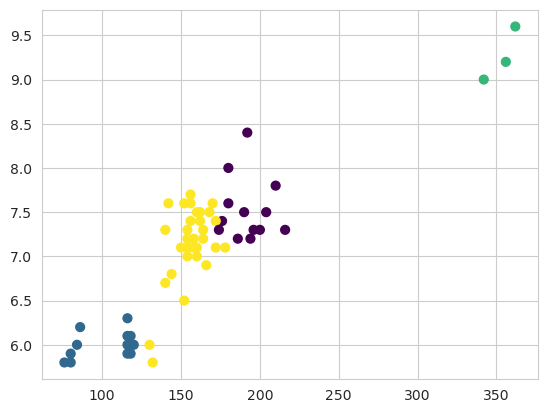

In [4]:
#Unsupervised Learning
# Gaussian Mixture Model (EM)
#routine method for converting categorical(qualititaive data) to numerical data
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from scipy.stats import randint

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, consensus_score, ConfusionMatrixDisplay, f1_score, classification_report)

data = pd.read_csv('fruit_data.csv')
df = pd.DataFrame(data)
class_names = df['fruit_name'].unique()

#print(df)
cat_columns = df.select_dtypes(['object']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])

# print dataframe
#df  
X = df.to_numpy()
X1 = X[:, 3:7]   ## features  : X -> x1, x2,.....xn
Y1 = X[:,1]      # Output : Y
# Now split the data into Training and Testing dataset
# Routine method for splitting numpy data
# Now split the data into Training and Testing dataset
# Routine method for splitting numpy data
X_train, X_test ,Y_train, Y_test = train_test_split(X1,Y1,test_size=0.33 , random_state= 42)


from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=4).fit(X1)
labels = gmm.predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=labels, s=40, cmap='viridis')

probs = gmm.predict_proba(X1)
print(probs[:5].round(3))

In [ ]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)